In [26]:
import pickle

import pandas as pd
from matplotlib import pyplot as plt

In [13]:
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [17]:
# Convert the list into a pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions, columns=["x1", "y1", "x2", "y2"])

# Interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [21]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2']) / 2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

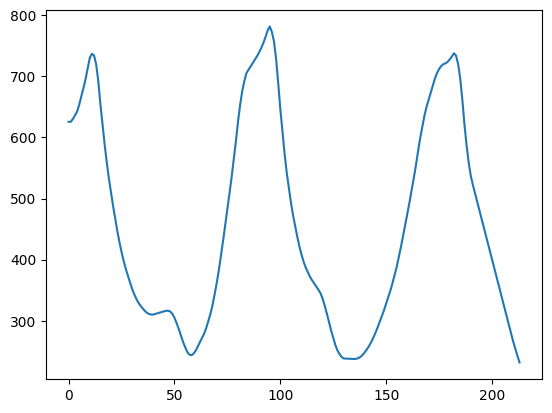

In [27]:
# Plot it
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [28]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

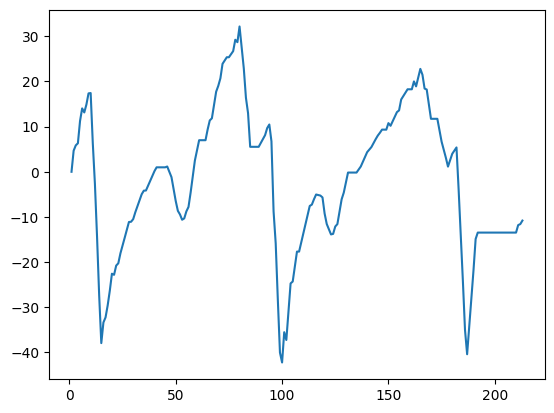

In [29]:
plt.plot(df_ball_positions['delta_y'])

In [30]:
df_ball_positions['ball_hit'] = 0

In [32]:
minimum_change_frames_for_hit = 25

df_ball_positions['ball_hit'] = 0

for i in range(1, len(df_ball_positions) - int(minimum_change_frames_for_hit * 1.2)):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] > 0 > df_ball_positions['delta_y'].iloc[i + 1]
    positive_position_change = df_ball_positions['delta_y'].iloc[i] < 0 < df_ball_positions['delta_y'].iloc[i + 1]

    if negative_position_change or positive_position_change:
        change_count = 0
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit * 1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] > 0 > df_ball_positions['delta_y'].iloc[change_frame]
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] < 0 < df_ball_positions['delta_y'].iloc[change_frame]

            if negative_position_change and negative_position_change_following_frame:
                change_count += 1
            if positive_position_change and positive_position_change_following_frame:
                change_count += 1

        if change_count > minimum_change_frames_for_hit - 1:
            df_ball_positions.loc[i, 'ball_hit'] = 1

frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()

In [42]:
# Hit frames
df_ball_positions[df_ball_positions['ball_hit'] == 1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,778.008911,717.428467,796.760742,737.474121,727.451294,736.788275,6.351477,1
58,927.026062,244.820774,938.171967,256.718357,250.769566,243.483999,-1.052795,1
95,616.243652,774.384705,639.890991,800.701355,787.543030,781.594348,6.738641,1
135,751.633423,231.871307,761.105408,242.002716,236.937012,237.280507,-0.171748,1
182,1296.810791,742.540649,1311.723145,758.232788,750.386719,737.751294,5.389380,1
